In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from collections import Counter 
import seaborn as sns
sns.set(style="darkgrid")


In [ ]:
path = '201806-capitalbikeshare-tripdata.csv'
df = pd.read_csv(path)
df.head()


In [3]:
time_by_bike = df.groupby('Bike number')['Duration'].mean()
usage_by_bike = df.groupby('Bike number')['Bike number'].count().rename('Count')
bikes = sorted(list(df['Bike number'].unique()))


In [ ]:
usage_time_by_bike = pd.concat([usage_by_bike, time_by_bike], axis=1)
usage_time_by_bike.head()


In [18]:
count = list(usage_time_by_bike['Count'])
duration = list(usage_time_by_bike['Duration'])
b,c,d = zip(*sorted(list(zip(bikes, count, duration)), key=lambda x: (x[1], x[2], x[0]), reverse=True))
m = list(df['Member type'])


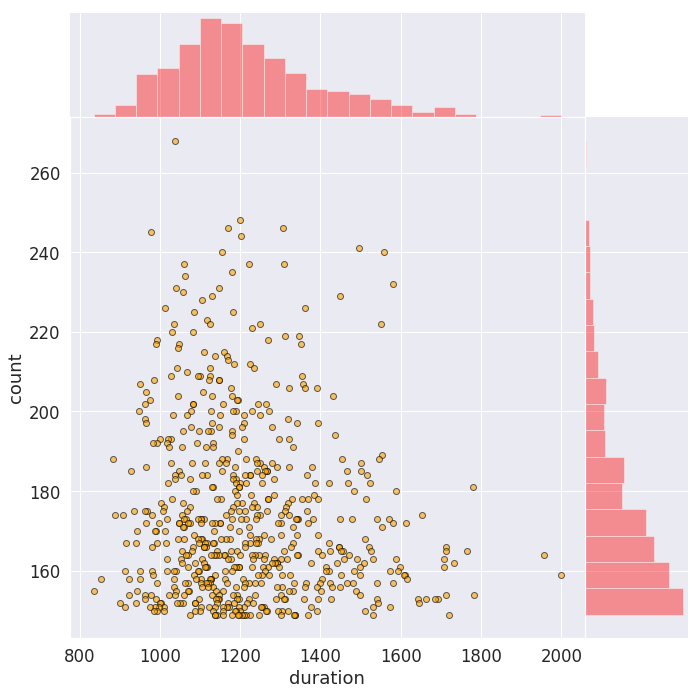

In [19]:
data = pd.DataFrame({
    'count': c[:600],
    'duration': d[:600],
    'bike' : b[:600],
    'member': m[:600]
})

g = sns.JointGrid(x="duration", y="count", data=data, height=10, space=0)
g = g.plot_joint(plt.scatter, alpha=0.6, color="orange", edgecolor="black")
g = g.plot_marginals(sns.distplot, kde=False, color="red")

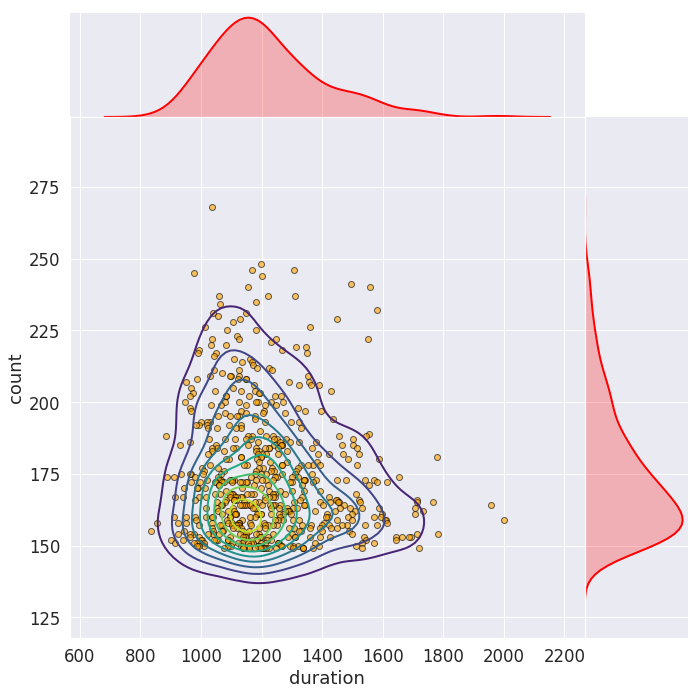

In [11]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
g = sns.JointGrid(x="duration", y="count", data=data, height=10, space=0)
g = g.plot_joint(plt.scatter, alpha=0.6, color="orange", edgecolor="black")
g = g.plot_joint(sns.kdeplot, cmap="viridis",)
g = g.plot_marginals(sns.kdeplot, color="red", shade=True)

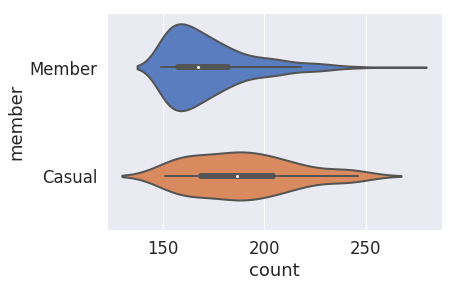

In [27]:
ax = sns.violinplot(x="count", y="member", data=data, palette="muted", split=True)

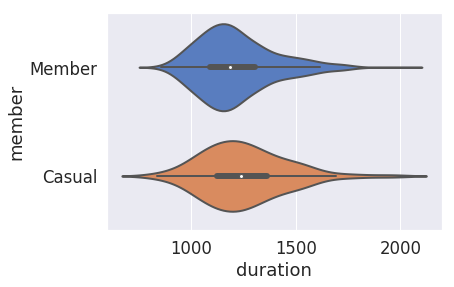

In [28]:
ax = sns.violinplot(x="duration", y="member", data=data, palette="muted", split=True)